### Titanic Disaster  - Survival Prediction
------------------------------
Predict which passengers survived the tragedy.

In [1]:
#IMPORTS
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

#SETTINGS
%matplotlib inline
plt.style.use('seaborn')

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [11]:
train = pd.read_csv('train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Lets have a look at the some metrics of this dataframe and visualize null values in it.

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


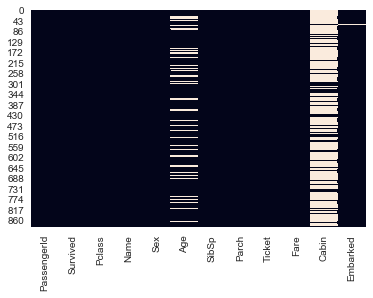

In [10]:
train.info()
sns.heatmap(train.isnull(), cbar=False);

We see null values in below columns:
- Cabin: Many null values and can be ignored. Would have been useful if we had more data and known the location of cabin in the ship to determine if it had any relation to survival of the passenger.
- Age: This column has few null values. Let's see later if it had any role in survival.
------------------------
Let us study 'Sex' column. It would be interesting to see how survival is effected by gender.

        Count        pct
male      577  64.758698
female    314  35.241302


Sex     Survived
female  1           74.203822
        0           25.796178
male    0           81.109185
        1           18.890815
Name: Survived, dtype: float64

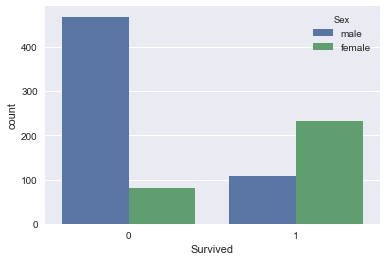

In [25]:
gender = train['Sex'].value_counts().to_frame('Count')
gender['pct'] = (gender['Count']/gender['Count'].sum())*100
print(gender)
train.groupby('Sex')['Survived'].value_counts(normalize=True)*100
ax = sns.countplot(x='Survived', hue='Sex', data=train)